# Timeseries Analysis 

## Data Cleaning and Basic EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df=pd.read_csv("daily-minimum-temperatures.csv")

In [4]:
df.head()

,Date,Temp,Unnamed: 2
0,01-01-1981,20.7,NaN
1,02-01-1981,17.9,NaN
2,03-01-1981,18.8,NaN
3,04-01-1981,14.6,NaN
4,05-01-1981,15.8,NaN


In [5]:
df.shape

(3652, 3)

In [6]:
df["Unnamed: 2"].value_counts()

Unnamed: 2
1981-1990    1
Name: count, dtype: int64

In [7]:
df.drop("Unnamed: 2",axis=1, inplace =True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3651 non-null   object
 1   Temp    3651 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [9]:
df["Temp"]=pd.to_numeric(df["Temp"],errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3651 non-null   object 
 1   Temp    3647 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [10]:
df.isnull().sum()

Date    1
Temp    5
dtype: int64

In [11]:
# Missing values: check counts and percentage
missing_count = df.isna().sum()
missing_pct = 100 * missing_count / len(df)
missing_summary = pd.concat([missing_count, missing_pct], axis=1)
missing_summary.columns = ['Missing_Count', 'Missing_Percentage']
display(missing_summary.sort_values('Missing_Count', ascending=False))

,Missing_Count,Missing_Percentage
Temp,5,0.136911
Date,1,0.027382


In [12]:
df=df.dropna()
df.isnull().sum()

Date    0
Temp    0
dtype: int64

In [13]:
df["Date"]=pd.to_datetime(df["Date"], format = "%d-%m-%Y")
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3647 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3647 non-null   datetime64[ns]
 1   Temp    3647 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.5 KB


In [15]:
display(df.describe(include='all').T)

,count,mean,min,25%,50%,75%,max,std
Date,3647,1986-01-01 03:18:12.733753792,1981-01-01 00:00:00,1983-07-03 12:00:00,1986-01-02 00:00:00,1988-07-01 12:00:00,1990-12-31 00:00:00,NaN
Temp,3647.0,11.186647,0.0,8.3,11.0,14.0,26.3,4.061671


## Visulization of Data

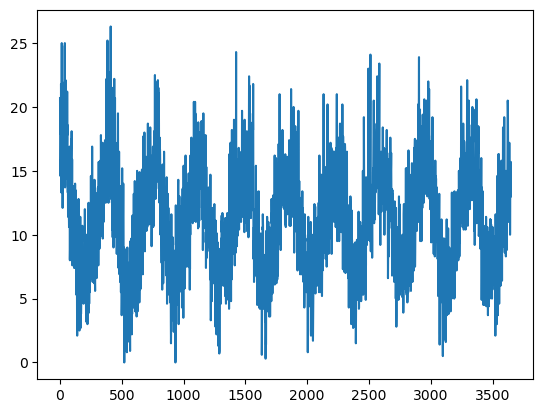

In [16]:
#Kline plot
plt.plot(df["Temp"])
plt.show()

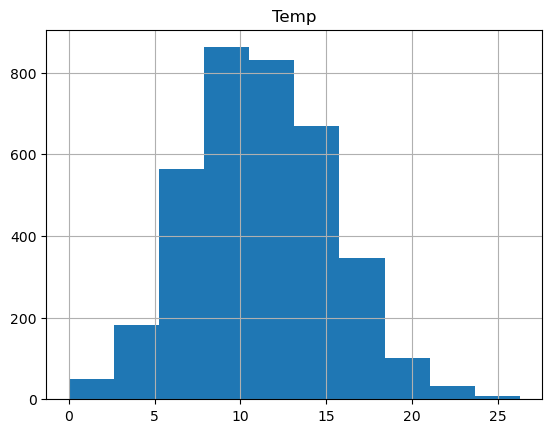

In [17]:
#Histogram
df.hist("Temp")
plt.show()

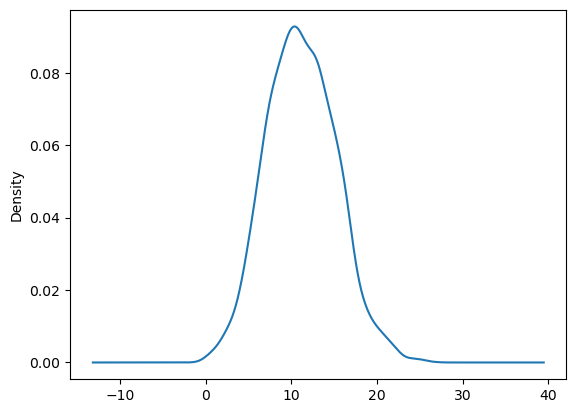

In [18]:
#Density plot
df["Temp"].plot(kind="kde")
plt.show()

In [19]:
# Boxplot
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month

In [20]:
df.head()

,Date,Temp,Year,Month
0,1981-01-01,20.7,1981,1
1,1981-01-02,17.9,1981,1
2,1981-01-03,18.8,1981,1
3,1981-01-04,14.6,1981,1
4,1981-01-05,15.8,1981,1


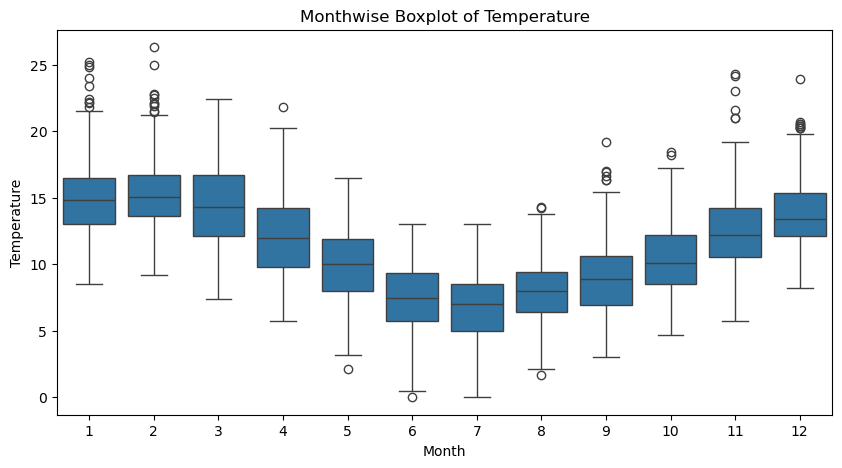

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Month",y="Temp",data=df)
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Monthwise Boxplot of Temperature")
plt.show()

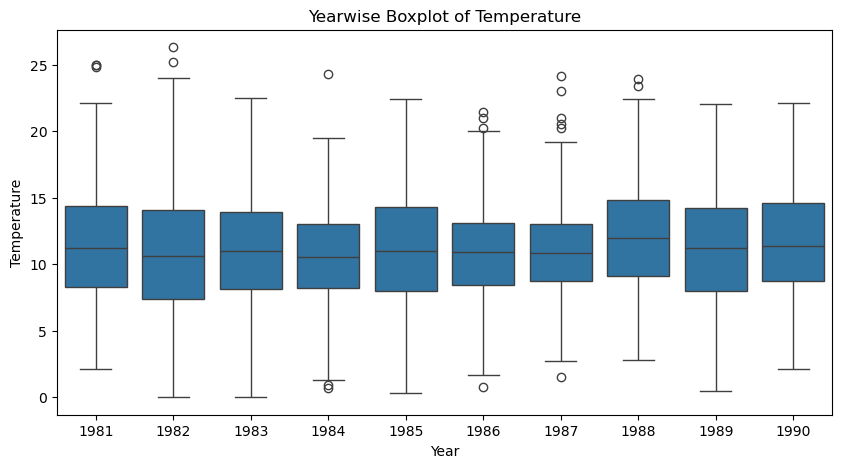

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Year",y="Temp",data=df)
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Yearwise Boxplot of Temperature")
plt.show()

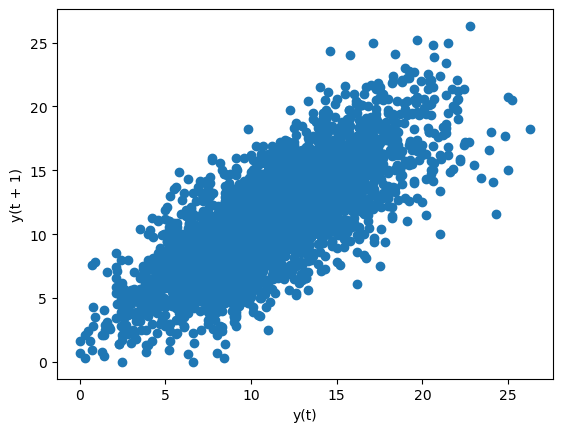

In [23]:
# Lag Plot
from pandas.plotting import lag_plot
lag_plot(df["Temp"])
plt.show()

<Figure size 4000x1000 with 0 Axes>

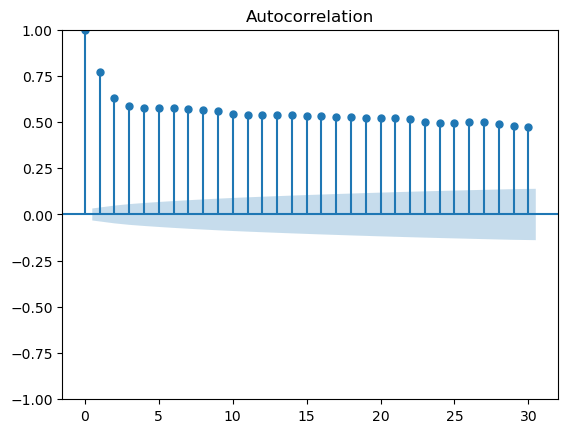

In [24]:
# Create an Autocorrelation Plot
plt.figure(figsize=(40,10))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["Temp"],lags=30)
plt.show()